### One dimensional convolutions

A convolution of an one-dimensional array with a kernel comprises of taking the kernel, sliding it along the array, multiplying it with the items in the array that overlap with the kernel in that location and summing this product.
* Instructions
    * Multiply each window in the input array with the kernel and sum the multiplied result and allocate the result into the correct entry in the output array (conv).

In [1]:
import numpy as np

In [3]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Output array
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+3]).sum()

# Print conv
print(conv)

[ 1 -1  1 -1  1 -1  1 -1  0  0]


In [6]:
array[1:3]

array([1, 0, 1])

### Image convolutions

The convolution of an image with a kernel summarizes a part of the image as the sum of the multiplication of that part of the image with the kernel. In this exercise, you will write the code that executes a convolution of an image with a kernel using Numpy. Given a black and white image that is stored in the variable im, write the operations inside the loop that would execute the convolution with the provided kernel.
* Instructions

    * Select the right window from the image in each iteration and multiply this part of the image with the kernel.
    * Sum the result and allocate the sum to the correct entry in the output array (results).


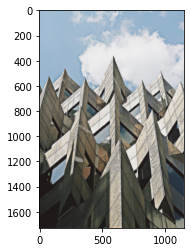

In [7]:
# Import matplotlib
import matplotlib.pyplot as plt

# Load the image
im = plt.imread('../building_image.jpg')

# Display the image
plt.imshow(im)
plt.show()

In [9]:
im.shape

(1728, 1152, 3)

In [10]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(im.shape)

# Output array
for ii in range(im.shape[0] - 3):
    for jj in range(im.shape[1] - 3):
        result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()

# Print result
print(result)

[[[2739. 2739. 2739.]
  [2758. 2758. 2758.]
  [2789. 2789. 2789.]
  ...
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 [[2754. 2754. 2754.]
  [2794. 2794. 2794.]
  [2792. 2792. 2792.]
  ...
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 [[2776. 2776. 2776.]
  [2805. 2805. 2805.]
  [2805. 2805. 2805.]
  ...
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 ...

 [[   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]
  ...
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 [[   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]
  ...
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 [[   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]
  ...
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]]


In [ ]:
# Define a kernel that finds horizontal lines in images.
kernel = np.array([[-1, -1, -1], 
                   [1, 1, 1],
                   [-1, -1 ,-1]])

In [ ]:
# Define a kernel that finds a light spot surrounded by dark pixels.
kernel = np.array([[-1, -1, -1], 
                   [-1, 1, -1],
                   [-1, -1 ,-1]])

In [ ]:
# Define a kernel that finds a dark spot surrounded by bright pixels.
kernel = np.array([[1, 1, 1], 
                   [1, -1, 1], 
                   [1, 1 ,1]])

### Convolutional network for image classification

Convolutional networks for classification are constructed from a sequence of convolutional layers (for image processing) and fully connected (Dense) layers (for readout). In this exercise, you will construct a small convolutional network for classification of the data from the fashion dataset.
* Instructions* 

    * Add a Conv2D layer to construct the input layer of the network. Use a kernel size of 3 by 3. You can use the img_rows and img_cols objects available in your workspace to define the input_shape of this layer.
    * Add a Flatten layer to translate between the image processing and classification part of your network.
    * Add a Dense layer to classify the 3 different categories of clothing in the dataset.


In [21]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [18]:
img_rows, img_cols = 28, 28

# Import the necessary components from Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
               input_shape=(img_rows, img_cols, 1)))

# Flatten the output of the convolutional layer
model.add(Flatten())
# Add an output layer for the 3 categories
model.add(Dense(3, activation='softmax'))

### Training a CNN to classify clothing types

Before training a neural network it needs to be compiled with the right cost function, using the right optimizer. During compilation, you can also define metrics that the network calculates and reports in every epoch. Model fitting requires a training data set, together with the training labels to the network.

The Conv2D model you built in the previous exercise is available in your workspace.
* Instructions

    * Compile the network using the 'adam' optimizer and the 'categorical_crossentropy' cost function. In the metrics list define that the network to report 'accuracy'.
    * Fit the network on train_data and train_labels. Train for 3 epochs with a batch size of 10 images. In training, set aside 20% of the data as a validation set, using the validation_split keyword argument.


In [19]:
(train_data, train_labels), \
                    (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [22]:
train_data = train_data[(train_labels >= 0)\
                        & (train_labels < 3)][0:50].reshape(-1, 28, 28, 1)
train_labels = train_labels[(train_labels >= 0) & (train_labels < 3)][0:50]
train_labels = pd.get_dummies(train_labels).to_numpy()

In [23]:
test_data = test_data[(test_labels >= 0) & (test_labels < 3)][0:10].reshape(-1, 28, 28, 1)
test_labels = test_labels[(test_labels >= 0) & (test_labels < 3)][0:10]
test_labels = pd.get_dummies(test_labels).to_numpy()

In [29]:
# Compile the model 
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model on a training set
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

Epoch 1/3
4/4 [==============================] - 1s 80ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.4934 - val_accuracy: 0.9000
Epoch 2/3
4/4 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.4892 - val_accuracy: 0.9000
Epoch 3/3
4/4 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.4834 - val_accuracy: 0.9000


In [31]:
# Evaluate the model on separate test data
model.evaluate(test_data, test_labels, batch_size=10)

1/1 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

### Add padding to a CNN

Padding allows a convolutional layer to retain the resolution of the input into this layer. This is done by adding zeros around the edges of the input image, so that the convolution kernel can overlap with the pixels on the edge of the image.

In [32]:
# Initialize the model
new_model = Sequential()

# Add the convolutional layer
new_model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1), 
                 padding='same'))

# Feed into output layer
new_model.add(Flatten())
new_model.add(Dense(3, activation='softmax'))

### Add strides to a convolutional network

The size of the strides of the convolution kernel determines whether the kernel will skip over some of the pixels as it slides along the image. This affects the size of the output because when strides are larger than one, the kernel will be centered on only some of the pixels.

In [34]:
# Initialize the model
model2 = Sequential()

# Add the convolutional layer
model2.add(Conv2D(10, kernel_size=3, activation='relu', 
              input_shape=(img_rows, img_cols, 1), 
              strides=2))

# Feed into output layer
model2.add(Flatten())
model2.add(Dense(3, activation='softmax'))